Part C – Programming Task
1. Implement A* search on a maze (given as a 2D matrix where 1=wall, 0=path, A=start,
B=goal).

- Use Manhattan distance as heuristic.

In [1]:

import heapq
import matplotlib.pyplot as plt
import numpy as np

# Manhattan distance heuristic
def manhattan(a, b):
    return abs(a[0] - b[0]) + abs(a[1] - b[1])


In [2]:

def astar(maze, start, goal, heuristic):
    rows, cols = maze.shape
    open_list = []
    heapq.heappush(open_list, (0, start))

    came_from = {}
    g_score = {start: 0}
    f_score = {start: heuristic(start, goal)}

    while open_list:
        _, current = heapq.heappop(open_list)

        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1], g_score[goal]

        neighbors = [(0,1), (1,0), (0,-1), (-1,0)]
        for dx, dy in neighbors:
            neighbor = (current[0] + dx, current[1] + dy)

            if 0 <= neighbor[0] < rows and 0 <= neighbor[1] < cols:
                if maze[neighbor] == 1:
                    continue

                tentative_g = g_score[current] + 1
                if neighbor not in g_score or tentative_g < g_score[neighbor]:
                    came_from[neighbor] = current
                    g_score[neighbor] = tentative_g
                    f_score[neighbor] = tentative_g + heuristic(neighbor, goal)
                    heapq.heappush(open_list, (f_score[neighbor], neighbor))

    return None, float('inf')


In [3]:

maze_example = [
    ['A', 1,  1,  0,  0,  0, 1, 0, 0, 1, 0, 0],
    [0,   0,  1,  0,  1,  0, 1, 0, 1, 0, 0, 0],
    [1,   0,  0,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   1,  1,  0,  0,  1, 1, 0, 0, 0, 1, 0],
    [0,   0,  0,  0,  1,  0, 1, 1, 1, 0, 0, 0],
    [1,   1,  1,  0,  1,  0, 0, 0, 1, 1, 1, 0],
    [0,   0,  1,  0,  0,  0, 1, 0, 0, 0, 1, 0],
    [0,   1,  0,  1,  1,  0, 1, 1, 1, 0, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 0, 1, 0, 0, 0],
    [1,   1,  1,  1,  1,  1, 0, 1, 0, 1, 1, 0],
    [0,   0,  0,  0,  0,  0, 0, 1, 0, 0, 0, 0],
    [0,   1,  1,  1,  1,  1, 1, 1, 1, 1, 1, 'B'],
]



maze_np = np.zeros((len(maze_example), len(maze_example[0])), dtype=int)
start, goal = None, None
for i in range(len(maze_example)):
    for j in range(len(maze_example[0])):
        if maze_example[i][j] == 'A':
            start = (i, j)
            maze_np[i, j] = 0
        elif maze_example[i][j] == 'B':
            goal = (i, j)
            maze_np[i, j] = 0
        else:
            maze_np[i, j] = maze_example[i][j]


In [4]:

def visualize(maze, path, start, goal, title):
    plt.figure(figsize=(7,7))
    plt.imshow(maze, cmap="binary")
    plt.xticks(range(maze.shape[1]))
    plt.yticks(range(maze.shape[0]))
    plt.grid(True)

    if path:
        px, py = zip(*path)
        plt.plot(py, px, marker="o", color="red", linewidth=2)

    plt.scatter(start[1], start[0], color="green", s=100, label="A (Start)")
    plt.scatter(goal[1], goal[0], color="blue", s=100, label="B (Goal)")
    plt.legend()
    plt.title(title)
    plt.show()


Case 0 - Standard Manhattan:
Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
Cost: 24


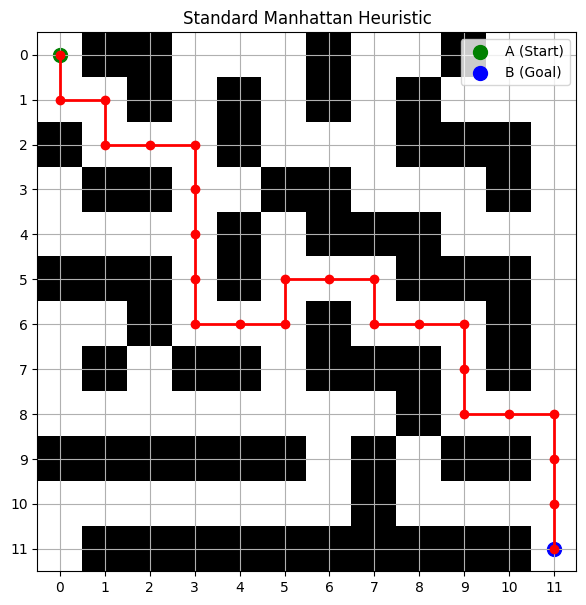

In [5]:

#Standard Manhattan
path, cost = astar(maze_np, start, goal, manhattan)
print("Case 0 - Standard Manhattan:")
print("Path:", path)
print("Cost:", cost)
visualize(maze_np, path, start, goal, "Standard Manhattan Heuristic")


2. Modify the heuristic:

- Case 1: Multiply Manhattan distance by 1.5 (check if it is admissible).

In [6]:

def heuristic_case1(a, b):
    return 1.5 * manhattan(a, b)




No, it is not admissible.

- Case 2: Define heuristic so that for one edge it violates consistency.

In [7]:
def heuristic_case2(a, b):
    if a == (1,3):
        return manhattan(a, b) - 17
    if a == (3,3):
        return manhattan(a, b) + 50
    return manhattan(a, b)

3. For each case, run A* and record:
- Path found
- Cost of path
- Whether the path is optimal

Case 1 - Manhattan x 1.5:
Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (3, 3), (4, 3), (5, 3), (6, 3), (6, 4), (6, 5), (5, 5), (5, 6), (5, 7), (6, 7), (6, 8), (6, 9), (7, 9), (8, 9), (8, 10), (8, 11), (9, 11), (10, 11), (11, 11)]
Cost: 24


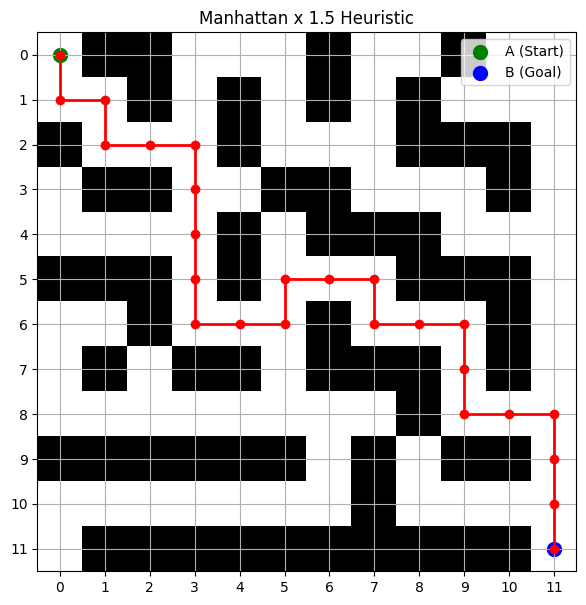

In [8]:

# Case 1: Manhattan x 1.5
path, cost = astar(maze_np, start, goal, heuristic_case1)
print("Case 1 - Manhattan x 1.5:")
print("Path:", path)
print("Cost:", cost)
visualize(maze_np, path, start, goal, "Manhattan x 1.5 Heuristic")


This is the optimal path.

Case 2 - Inconsistent Heuristic:
Path: [(0, 0), (1, 0), (1, 1), (2, 1), (2, 2), (2, 3), (1, 3), (0, 3), (0, 4), (0, 5), (1, 5), (2, 5), (2, 6), (2, 7), (3, 7), (3, 8), (3, 9), (4, 9), (4, 10), (4, 11), (5, 11), (6, 11), (7, 11), (8, 11), (9, 11), (10, 11), (11, 11)]
Cost: 26


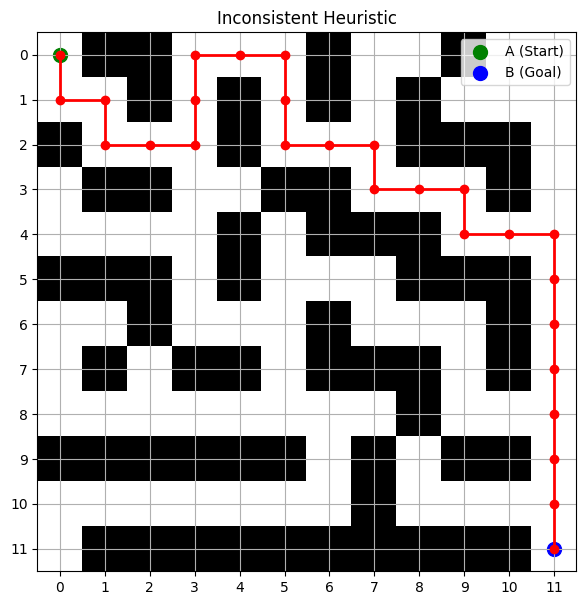

In [9]:

# Case 2: Inconsistent Heuristic
path, cost = astar(maze_np, start, goal, heuristic_case2)
print("Case 2 - Inconsistent Heuristic:")
print("Path:", path)
print("Cost:", cost)
visualize(maze_np, path, start, goal, "Inconsistent Heuristic")


This is not the optimal path.